# Title: Weather Data analysis Real world Project with python
### Introduction

* The weather dataset used in this analysis is a time-series data set with per hour information about the weather condition in 2012. Temp, vissibility, wind speed dew point are recorded

* The data is a csv file and analysis is done using pandas 
* The data will be saved and exported to power bi for good visualisations
* matplotlib and searbon will be used for some data visualisations to get the inisghts of the data 

#### Questions to answer

These Questions will be answered under phase3: of the data analysis 


* find the unique weather of the values in the data

* find the number of times when the weather was exactly 'fog only'

* find the number of times when 'wind speed is exactly is 4km/h'

* What is the mean vissibility

* What is the standard deviation of pressure in this data

* What is the variance of the relative humidity

* Create the column of day_name, month and year

* Find all the instance when wind speed is above 24 and vissibility is 25

* on which day was the humidity high

* which month had the temperatures less than -22 degrees celcius

* find the correlation of the data set and plot the visuals

* find all instances when the snow was recorded

* what was the mean weather monthly

* what is the mean value of each column against each column 'weather column)

* what is the min and max value of each column against each weather condition

They will help in the story telling of in this data

# Phase 1: Prepare

This step involves data import,it includes import of libraries that facilitate data import, analysis and visualisation.



In [1]:
import pandas as pd               #for data loading and manipulation
import numpy as np                #for stastical analysis
import matplotlib.pyplot as plt        #for data visualisation
import seaborn as sns
import matplotlib
%matplotlib inline 

C:\Users\geeth\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
na_vals = [' ', 'nan', 'Nan', '?', 'missing', 'Missing']      #the list containing all the values that are to be deemed as null values

df = pd.read_csv(r'C:\Users\geeth\Desktop\DATA ANALYSIS\WEATHER_data.csv', na_values = na_vals)


#take note of the dataset directory, click on the dataset that needs to be imported and copy path or
#go to properties >> right click on the dataset >> security >> copy the path that shows beneath written as object name
#take note, on both cases insert r before the path directory.

#The other method inputting r doesnt matter
#import the dataset into the jupyter notebook folder you working on and copy the name of the dataset hence insert it in the parentheses

In [3]:
df.head(5)              #getting the first 2 rows of data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
#the size of the dataset
df.shape

(8784, 8)

The dataset has 8784 rows and 8 columns

In [5]:
#take note on all of the columns of the dataset
df.columns.to_frame()

,0
Date/Time,Date/Time
Temp_C,Temp_C
Dew Point Temp_C,Dew Point Temp_C
Rel Hum_%,Rel Hum_%
Wind Speed_km/h,Wind Speed_km/h
Visibility_km,Visibility_km
Press_kPa,Press_kPa
Weather,Weather


In [6]:
#check the data types of the columns
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

The date/Time column has to be set to timestamp in the next phase for the ease of analysis

In [7]:
#a total of non null values in a dataframe
df.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

taking into consideration of the shape of the dataste there dont seem to be null or missing values in the dataset

# Phase 2: Data Processing

This phase includes all the cleaning, transforming and processing of data

### Step 1: Check for all the the missing or na values in the dataset

In [8]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

there are no missing values, as predicted by the df.count() method done in the phase one of analysis

### Step 2: Checking and handling the data duplicates

In [9]:
df.duplicated().sum()

0

There are no duplicates in the dataset

### Step 3: Change the data types to more suitable format

In [10]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

The date/time column, datatype is object instead of datetime hence it needs to be converted

In [11]:
#converting the oject datatype to datetime

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [12]:
df['Date/Time'].dtype

dtype('<M8[ns]')

In [13]:
#view 4 rows of the data
df.head(4)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"


### Step 3: Rename the columns to have more meaning

In [14]:
df.rename(columns={'Rel Hum_%':'Relative_Humidity_%', 'Temp_C':'Temperature_C', 'Press_kPa':'Pressure_kPa'}, inplace=True)

#inplace = True makes the changes to apply to the entire dataset

### Step 4: format the columns headers to lower cases with the underscore at each space and with lower cases

In [15]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.title()

# Phase 3:  Exploratory Data analysis

* EDA is an approach to anaylse data inorder to summarize main characteristics of the data
* It also helps to gain better understanding of the dataset
* helps uncover relationships between different variables 
* extract the important variables for the problem being solved

#### Q1: find the unique weather of the values in the data

In [16]:
#view the dataset
df.head(3)

,Date/Time,Temperature_C,Dew_Point_Temp_C,Relative_Humidity_%,Wind_Speed_Km/H,Visibility_Km,Pressure_Kpa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


In [17]:
#grab the series series or column weather and find the unique values
#unique takes the single appearing values in the dataset
df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

#### Q2: find the number of times when the weather was exactly 'fog only'

In [18]:
filt = df['Weather'] == 'Fog'          #setting up a filtering condition 
df.loc[filt, 'Weather'].count()        #getting the actual count on what or number of conditions that really happened

150

the weather was fog 150 times

#### Q3: find the number of times when 'wind speed is exactly is 4km/h'

In [19]:
df.head()

,Date/Time,Temperature_C,Dew_Point_Temp_C,Relative_Humidity_%,Wind_Speed_Km/H,Visibility_Km,Pressure_Kpa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [20]:
filt = df['Wind_Speed_Km/H'] == 4  #create a condition where spped is 4km/h
df.loc[filt, 'Wind_Speed_Km/H'].count()      #counts number of rows through which the condition filt is satsfied

474

The wind speed was 4 km/h in 474 times

#### Q4:What is the mean vissibility

In [21]:
#view the dataset again
df.head(2)

,Date/Time,Temperature_C,Dew_Point_Temp_C,Relative_Humidity_%,Wind_Speed_Km/H,Visibility_Km,Pressure_Kpa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [22]:
df['Visibility_Km'].mean(axis=0)      # mean is calculated along the rows or horizontally

27.66444672131151

mean vissibility is 27.67

#### Q5: What is the standard deviation of pressure in this data

In [23]:
df['Pressure_Kpa'].std(axis=0)   #calculating the standard variation axis =0 thats horizontally

0.8440047459486474

standard deviation is 0.844

#### Q6: What is the variance of the relative humidity

In [24]:
df['Relative_Humidity_%'].var()   #calculating the variance axis =0 thats horizontally

286.2485501984998

#### Q7: Create the column of day_name, month and year

In [25]:
df['day_name'] = df['Date/Time'].dt.day_name()    #inserting the column in all three occasion
df['month'] = df['Date/Time'].dt.month         #creating the month column
df['year'] = df['Date/Time'].dt.year         #creating the year column

df.head(1)              #review of the dataframe with added columns

,Date/Time,Temperature_C,Dew_Point_Temp_C,Relative_Humidity_%,Wind_Speed_Km/H,Visibility_Km,Pressure_Kpa,Weather,day_name,month,year
0,2012-01-01,-1.8,-3.9,86,4,8.0,101.24,Fog,Sunday,1,2012


* The df has added in 3 columns
* hoever the month column is in numerical form, hence it needs to be changed to actual months

In [26]:
#replace the numbers in the month column of the dataset, to actual month names

df['month'] = df['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',
                                  11:'Nov', 12:'Dec'})

In [27]:
#check the dataset the month column
df['month'].head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: month, dtype: object

#### Q8:Find all the instance when wind speed is above 24 and vissibility is 25

In [28]:
df.head(1)

,Date/Time,Temperature_C,Dew_Point_Temp_C,Relative_Humidity_%,Wind_Speed_Km/H,Visibility_Km,Pressure_Kpa,Weather,day_name,month,year
0,2012-01-01,-1.8,-3.9,86,4,8.0,101.24,Fog,Sunday,Jan,2012


In [29]:
filt = (df['Wind_Speed_Km/H'] > 24) & (df['Wind_Speed_Km/H'] > 25)                  #2 conditions to be met
df[filt]

,Date/Time,Temperature_C,Dew_Point_Temp_C,Relative_Humidity_%,Wind_Speed_Km/H,Visibility_Km,Pressure_Kpa,Weather,day_name,month,year
23,2012-01-01 23:00:00,5.3,2.0,79,30,25.0,99.31,Cloudy,Sunday,Jan,2012
24,2012-01-02 00:00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers,Monday,Jan,2012
25,2012-01-02 01:00:00,4.6,0.0,72,39,25.0,99.26,Cloudy,Monday,Jan,2012
26,2012-01-02 02:00:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy,Monday,Jan,2012
27,2012-01-02 03:00:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy,Monday,Jan,2012
...,...,...,...,...,...,...,...,...,...,...,...
8760,2012-12-31 00:00:00,-11.1,-14.4,77,26,25.0,101.51,Cloudy,Monday,Dec,2012
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,Monday,Dec,2012
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,Monday,Dec,2012
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,Monday,Dec,2012


it occured 232 time

#### Q9: on which day was the humidity high

In [30]:
df.groupby('day_name')['Relative_Humidity_%'].max().sort_values(ascending=False)    #sort with biggest, hence ascending =False

day_name
Saturday     100
Sunday       100
Thursday     100
Tuesday      100
Wednesday    100
Friday        99
Monday        99
Name: Relative_Humidity_%, dtype: int64

max humidity was 100 in 5 days

#### Q10: which month had the temperatures less than -22 degrees celcius

In [31]:
filt = df['Temperature_C'] < -22            #inserting a conditon to be met
df[filt]['month']

342    Jan
343    Jan
344    Jan
345    Jan
Name: month, dtype: object

#### Q11: find the correlation of the data set

In [32]:
df.corr()   #finding the correlation of the fields

,Temperature_C,Dew_Point_Temp_C,Relative_Humidity_%,Wind_Speed_Km/H,Visibility_Km,Pressure_Kpa,year
Temperature_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389,NaN
Dew_Point_Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616,NaN
Relative_Humidity_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424,NaN
Wind_Speed_Km/H,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613,NaN
Visibility_Km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847,NaN
Pressure_Kpa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* There is strong relationship only between the temp and the dew_point_temp_c
* there is a good relationship between the vissibility and humidity in a negative way

#### plot the visuals

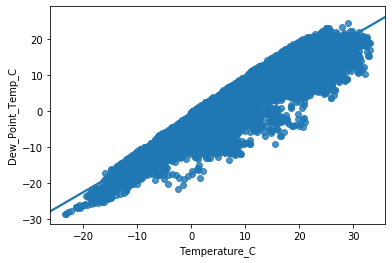

In [33]:
sns.regplot(df['Temperature_C'], df['Dew_Point_Temp_C'], data=df) #taking in 2 columns to check for their correlation


There is a strong correlation between the temp and the dew point temp as one increases the other incraeses as well

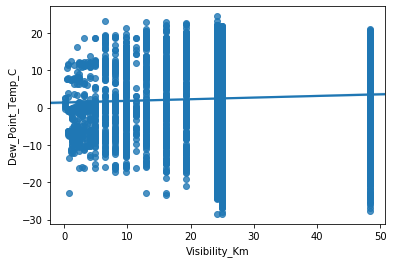

In [34]:
sns.regplot(df['Visibility_Km'], df['Dew_Point_Temp_C'], data=df)
#plt.scatter(df['visibility_km'], df['dew_point_temp_c'])

* the data is widely spread, it can be hard to tell the events taking place indicating a week correlation

#### Q12: find all instances when the snow was recorded

In [35]:
df[df['Weather'].str.contains('Snow')]   #checks the column weather for anyword with python in it to deal with it

,Date/Time,Temperature_C,Dew_Point_Temp_C,Relative_Humidity_%,Wind_Speed_Km/H,Visibility_Km,Pressure_Kpa,Weather,day_name,month,year
41,2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers,Monday,Jan,2012
44,2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers,Monday,Jan,2012
45,2012-01-02 21:00:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers,Monday,Jan,2012
47,2012-01-02 23:00:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers,Monday,Jan,2012
48,2012-01-03 00:00:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers,Tuesday,Jan,2012
...,...,...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,Monday,Dec,2012
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,Monday,Dec,2012
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,Monday,Dec,2012
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,Monday,Dec,2012


It was recorded on 583 conditions

#### Q13: what was the mean weather monthly throughout the year

In [36]:
df.groupby('month').Temperature_C.mean().sort_values(ascending=False)   #group the temp by month

month
Jul    22.790054
Aug    22.279301
Jun    20.134028
Sep    16.484444
May    16.237769
Oct    10.954973
Apr     7.009306
Mar     3.121237
Nov     0.931389
Dec    -3.306317
Feb    -4.225000
Jan    -7.371505
Name: Temperature_C, dtype: float64

July had the highest mean temperaratures and january had the lowest temperature

#### Q14: what is the mean value of each column against each  'weather column)

In [37]:
df.head(3)

,Date/Time,Temperature_C,Dew_Point_Temp_C,Relative_Humidity_%,Wind_Speed_Km/H,Visibility_Km,Pressure_Kpa,Weather,day_name,month,year
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Sunday,Jan,2012
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Sunday,Jan,2012
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",Sunday,Jan,2012


In [38]:
df.groupby('Weather').mean().head()

,Temperature_C,Dew_Point_Temp_C,Relative_Humidity_%,Wind_Speed_Km/H,Visibility_Km,Pressure_Kpa,year
Weather,,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443,2012.0
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441,2012.0
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366,2012.0
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625,2012.0
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000,2012.0


#### Q15: what is the min and max value of each column against each weather condition

In [39]:
df.groupby('Weather').min()

,Date/Time,Temperature_C,Dew_Point_Temp_C,Relative_Humidity_%,Wind_Speed_Km/H,Visibility_Km,Pressure_Kpa,day_name,month,year
Weather,,,,,,,,,,
Clear,2012-01-03 19:00:00,-23.3,-28.5,20,0,11.3,99.52,Friday,Apr,2012
Cloudy,2012-01-01 17:00:00,-21.4,-26.8,18,0,11.3,98.39,Friday,Apr,2012
Drizzle,2012-01-23 21:00:00,1.1,-0.2,74,0,6.4,97.84,Friday,Aug,2012
"Drizzle,Fog",2012-01-23 20:00:00,0.0,-1.6,85,0,1.0,98.65,Friday,Apr,2012
"Drizzle,Ice Pellets,Fog",2012-12-17 09:00:00,0.4,-0.7,92,20,4.0,100.79,Monday,Dec,2012
"Drizzle,Snow",2012-12-17 15:00:00,0.9,0.1,92,9,9.7,100.63,Monday,Dec,2012
"Drizzle,Snow,Fog",2012-12-18 21:00:00,0.3,-0.1,92,7,2.4,97.79,Friday,Dec,2012
Fog,2012-01-01 00:00:00,-16.0,-17.2,80,0,0.2,98.31,Friday,Apr,2012
Freezing Drizzle,2012-01-07 11:00:00,-9.0,-12.2,78,6,4.8,98.44,Friday,Dec,2012


In [40]:
df.groupby('Weather').max()

,Date/Time,Temperature_C,Dew_Point_Temp_C,Relative_Humidity_%,Wind_Speed_Km/H,Visibility_Km,Pressure_Kpa,day_name,month,year
Weather,,,,,,,,,,
Clear,2012-12-30 20:00:00,32.8,20.4,99,33,48.3,103.63,Wednesday,Sep,2012
Cloudy,2012-12-31 06:00:00,30.5,22.6,99,54,48.3,103.65,Wednesday,Sep,2012
Drizzle,2012-12-22 01:00:00,18.8,17.7,96,30,25.0,101.56,Wednesday,Sep,2012
"Drizzle,Fog",2012-12-19 10:00:00,19.9,19.1,100,28,9.7,102.07,Wednesday,Sep,2012
"Drizzle,Ice Pellets,Fog",2012-12-17 09:00:00,0.4,-0.7,92,20,4.0,100.79,Monday,Dec,2012
"Drizzle,Snow",2012-12-19 18:00:00,1.2,0.2,95,19,11.3,101.15,Wednesday,Dec,2012
"Drizzle,Snow,Fog",2012-12-22 03:00:00,1.1,0.6,98,32,9.7,100.15,Wednesday,Dec,2012
Fog,2012-12-29 10:00:00,20.8,19.6,100,22,9.7,103.04,Wednesday,Sep,2012
Freezing Drizzle,2012-12-17 00:00:00,-2.3,-3.3,93,26,12.9,101.02,Wednesday,Jan,2012


# Phase 4: Data Visualisation

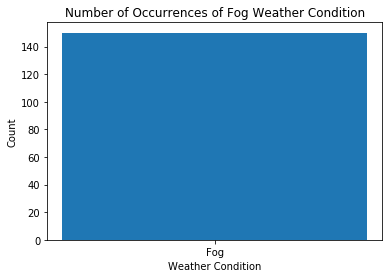

In [41]:


# Filter the data based on the weather condition
filt = df['Weather'] == 'Fog'
fog_count = df.loc[filt, 'Weather'].count()

# Create a bar chart of the fog count
fig, ax = plt.subplots()
ax.bar(['Fog'], [fog_count])

# Set the title and axis labels
ax.set_title('Number of Occurrences of Fog Weather Condition')
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Count')

# Show the plot
plt.show()


##### * **key takeaway:**  fog occured more than 140 times

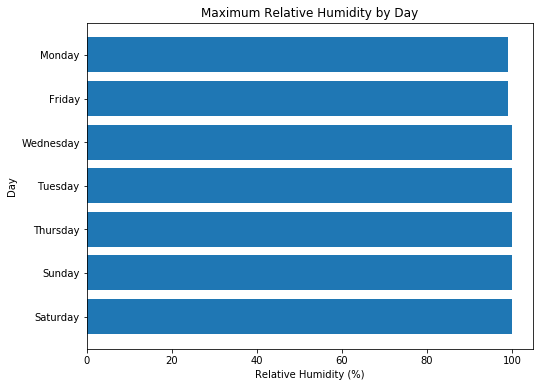

In [42]:


# Group the data by day_name and find the maximum Relative Humidity for each day
max_rh_by_day = df.groupby('day_name')['Relative_Humidity_%'].max().sort_values(ascending=False)

# Create a horizontal bar chart of the maximum Relative Humidity for each day
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(max_rh_by_day.index, max_rh_by_day)

# Set the title and axis labels
ax.set_title('Maximum Relative Humidity by Day')
ax.set_xlabel('Relative Humidity (%)')
ax.set_ylabel('Day')

# Show the plot
plt.show()


##### * **key takeaway:**  max humidity was there close to 100 in about 5 working days

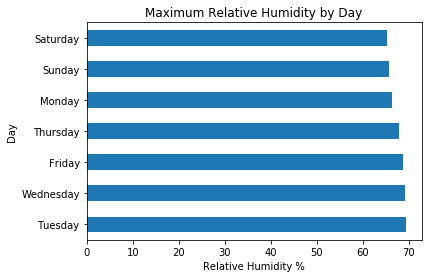

In [43]:
import matplotlib.pyplot as plt

grouped = df.groupby('day_name')['Relative_Humidity_%'].mean().sort_values(ascending=False)

grouped.plot(kind='barh')

plt.title('Maximum Relative Humidity by Day')
plt.xlabel('Relative Humidity %')
plt.ylabel('Day')
plt.show()


##### * **key takeaway:**  mean humidity was high mostly on tuesdays, the least being staurdays